In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib
import sys
sys.path.append('../code')

from diusst_eulera import diusst_eulera
from diusst_eulerc import diusst_eulerc

from simu_eulera import simulate_eulera
from simu_eulerc import simulate_eulerc


from mscfunctions import *
from interpolation import *

In [2]:
times_orig = np.linspace(0,2*86400,2*24*60)
len(times_orig)

2880

In [3]:
pm = np.zeros(24)
for i in range(24):
    pm[i] = np.where(times_orig/86400 > 1+ i/24)[0][0]
pm

array([1440., 1500., 1560., 1620., 1680., 1740., 1800., 1860., 1920.,
       1980., 2040., 2100., 2160., 2220., 2280., 2340., 2400., 2460.,
       2520., 2580., 2640., 2700., 2760., 2820.])

In [4]:
parama = [5e-4,1e-3,4]
sima = simulate_eulera(parama,dz0=0.10,ngrid=40)
simb = simulate_eulerb(parama)

Done, took  2.2961137294769287


NameError: name 'simulate_eulerb' is not defined

In [5]:
plt.plot(simb[i][2]/86400,simb[0][:,0]-300,c=cols[i])

NameError: name 'simb' is not defined

In [7]:
# A sensitivity
Akappas = [1e-5,5e-5,1e-4,2e-4,5e-4,1e-3]
Akappa = []
Akappamax = []
Akappashift = []
Akappaskin = []
for i in range(len(Akappas)):
    Ap = [Akappas[i], 5e-3,4,0.8,3]
    Akappa.append(simulate_eulerc(Ap,windcos=0,windstrength=0))
    Akappamax.append(np.amax(Akappa[i][0][:,0]-300))
    Akappashift.append(np.argmax(Akappa[i][0][:,0]-300)/len(Akappa[i][2])*48)
    Akappaskin.append(np.amin(Akappa[i][0][:,0]-300))

Done, took  0.5429954528808594
Done, took  0.5458698272705078
Done, took  0.5373237133026123
Done, took  0.544457197189331
Done, took  0.5397112369537354
Done, took  0.5424749851226807


In [10]:
Amus = [1e-6,1e-5,1e-4,1e-3,1e-2,1e-1]
Amu = []
Amumax = []
Amushift=[]
Amuskin=[]
for i in range(len(Amus)):
    Ap = [1e-4,Amus[i],4,0.8,3]
    Amu.append(simulate_eulerc(Ap,windcos=0,windstrength=0))
    Amumax.append(np.amax(Amu[i][0][:,0]-300))
    Amushift.append(np.argmax(Amu[i][0][:,0]-300)/len(Amu[i][2])*48)
    Amuskin.append(np.amin(Amu[i][0][:,0]-300))
    

Done, took  0.5602824687957764
Done, took  0.5784609317779541
Done, took  0.5907013416290283
Done, took  0.5810427665710449
Done, took  0.5765547752380371
Done, took  0.6510233879089355


In [12]:
Aalphas = [0.1,0.5,1,2,5,10]
Aalpha = []
Aalphamax = []
Aalphashift=[]
Aalphaskin=[]
for i in range(len(Aalphas)):
    Ap = [1e-4,5e-3,Aalphas[i],0.8,3]
    Aalpha.append(simulate_eulerc(Ap,windcos=0,windstrength=0))
    Aalphamax.append(np.amax(Aalpha[i][0][:,0]-300))
    Aalphashift.append(np.argmax(Aalpha[i][0][:,0]-300)/len(Aalpha[i][2])*48)
    Aalphaskin.append(np.amin(Aalpha[i][0][:,0]-300))

Done, took  0.7553889751434326
Done, took  0.5602343082427979
Done, took  0.556535005569458
Done, took  0.5453805923461914
Done, took  0.5514841079711914
Done, took  0.5430011749267578


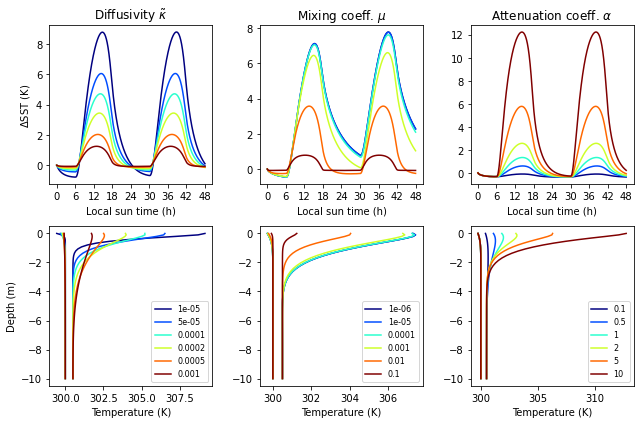

In [15]:
cols = matplotlib.cm.jet(np.linspace(0,1,6))
fig, ax = plt.subplots(2,3,figsize=(9,6))
for i in range(len(Akappas)):
    ax[0,0].plot(Akappa[i][2]/86400,Akappa[i][0][:,0]-300,c=cols[i])
    ax[0,1].plot(Amu[i][2]/86400,Amu[i][0][:,0]-300,c=cols[i])
    ax[0,2].plot(Aalpha[i][2]/86400,Aalpha[i][0][:,0]-300,c=cols[i])
    
    noon = int(len(Akappa[i][2])/48)*14
    am2 = int(len(Akappa[i][2])/48)*2
    ax[1,0].plot(Akappa[i][0][noon]+0.5,Akappa[i][1],c=cols[i], label=str(Akappas[i]))
    ax[1,0].plot(Akappa[i][0][am2],Akappa[i][1],c=cols[i])
    
    noon = int(len(Amu[i][2])/48)*14
    am2 = int(len(Amu[i][2])/48)*2
    ax[1,1].plot(Amu[i][0][noon]+0.5,Amu[i][1],c=cols[i], label=str(Amus[i]))
    ax[1,1].plot(Amu[i][0][am2],Amu[i][1],c=cols[i])
    
    noon = int(len(Aalpha[i][2])/48)*14
    am2 = int(len(Aalpha[i][2])/48)*2
    ax[1,2].plot(Aalpha[i][0][noon]+0.5,Aalpha[i][1],c=cols[i], label=str(Aalphas[i]))
    ax[1,2].plot(Aalpha[i][0][am2],Aalpha[i][1],c=cols[i])

ax[1,0].legend(fontsize=8)
ax[1,1].legend(fontsize=8)
ax[1,2].legend(fontsize=8)

titles=[r'Diffusivity $\tilde \kappa$',r'Mixing coeff. $\mu$',r'Attenuation coeff. $\alpha$']
for i in range(3):
    ax[0,i].set(xlabel='Local sun time (h)',xticks=np.arange(0,2.25,0.25),xticklabels=np.arange(0,48+6,6))
    ax[1,i].set(xlabel='Temperature (K)')
    ax[0,i].set_title(titles[i])
ax[0,0].set(ylabel=r'$\Delta$SST (K)')
ax[1,0].set(ylabel='Depth (m)')

fig.tight_layout()

#plt.savefig('../../Masterarbeit/thesis/figs/EXP_sensitivity.pdf',bbox_inches='tight')

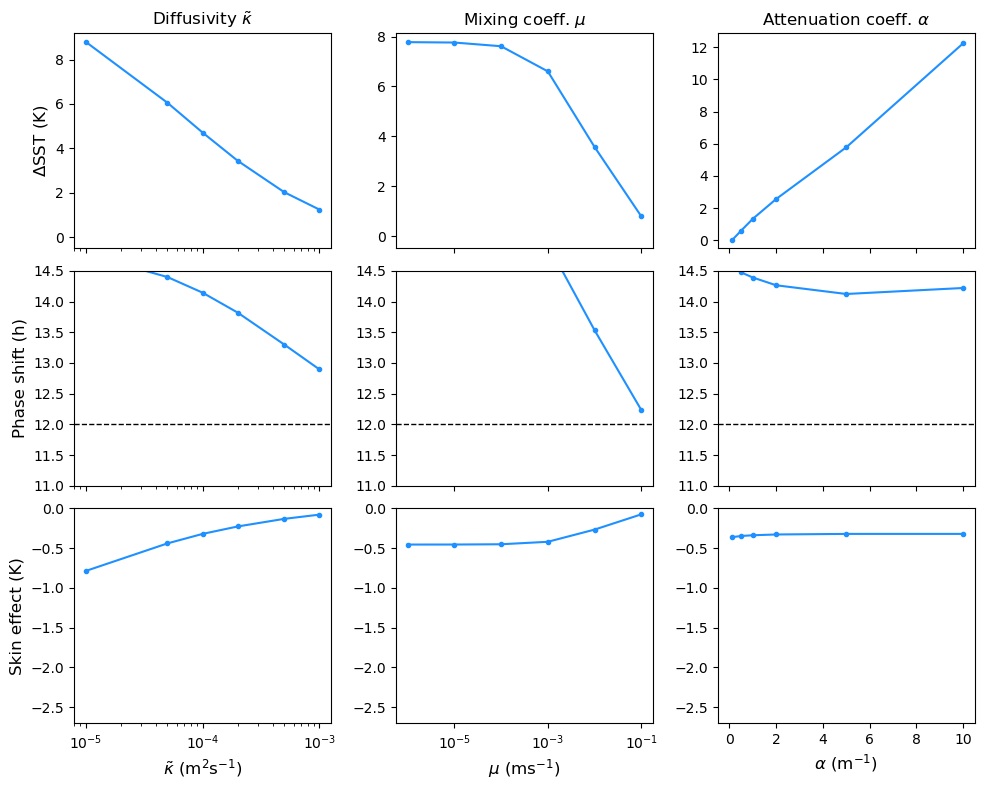

In [14]:
fig, ax = plt.subplots(3,3,dpi=100,figsize=(10,8))
ax[0,0].semilogx(Akappas,Akappamax,'.-', c='dodgerblue')
ax[1,0].semilogx(Akappas,np.array(Akappashift)%24,'.-', c='dodgerblue')
ax[2,0].semilogx(Akappas,Akappaskin,'.-', c='dodgerblue')

ax[0,1].semilogx(Amus,Amumax,'.-', c='dodgerblue')
ax[1,1].semilogx(Amus,np.array(Amushift)%24,'.-', c='dodgerblue')
ax[2,1].semilogx(Amus,Amuskin,'.-', c='dodgerblue')

ax[0,2].plot(Aalphas,Aalphamax,'.-', c='dodgerblue')
ax[1,2].plot(np.array(Aalphas)[np.array(Aalphashift)>0],np.array(Aalphashift)[np.array(Aalphashift)>0]%24,'.-', c='dodgerblue')
ax[2,2].plot(Aalphas,Aalphaskin,'.-', c='dodgerblue')

titles=[r'Diffusivity $\tilde \kappa$',r'Mixing coeff. $\mu$',r'Attenuation coeff. $\alpha$']
xlabels=[r'$\tilde \kappa$ (m$^2$s$^{-1}$)',r'$\mu$ (ms$^{-1}$)',r'$\alpha$ (m$^{-1}$)']
ylabels=[r'$\Delta$SST (K)', 'Phase shift (h)', 'Skin effect (K)']
for i in range(3):
    ax[0,i].set_title(titles[i],fontsize=12)
    ax[2,i].set_xlabel(xlabels[i],fontsize=12)
    ax[i,0].set_ylabel(ylabels[i],fontsize=12)
    ax[0,i].set(ylim=(-0.5,None))
    ax[1,i].set(ylim=(11.,14.5))
    ax[1,i].axhline(y=12,lw=1,ls='--',c='k')
    ax[2,i].set(ylim=(-2.7,0))
    ax[0,i].set(xticklabels=[])
    ax[1,i].set(xticklabels=[])
    ax[i,2].set(xlim=(-0.5,10.5))

fig.tight_layout(h_pad=0.6)

#plt.savefig('../../Masterarbeit/thesis/figs/EXP_sensitivity_stats.pdf',bbox_inches='tight')

In [ ]:
for i in range(6):
    print(Aalphashift)